# 📈 Linear Regression from Scratch (Gradient Descent)
A concise walkthrough of the theory, maths and pure-NumPy implementation of univariate linear regression.

## 🔍 What is Linear Regression?
- Models the **linear relationship** between features $X$ and a continuous target $y$.  
- Hypothesis:  
  $$
  \hat{y} = X w + b
  $$
- Learns $w$ (weights) and $b$ (bias) by **minimising Mean-Squared Error (MSE)**.  
- Optimisation here uses **batch gradient descent**.

## 🧮 Cost Function – MSE
$$
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m}(y_i - \hat{y}_i)^2
$$
We will also track **$R^2$ score** (coefficient of determination) for interpretability.

$$R^2 = 1 - \frac{\sum_{i=1}^{m}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{m}(y_i - \bar{y})^2}$$

In [1]:
import numpy as np

def mean_squared_error(y_true, y_pred):
    """Vectorised MSE."""
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    """Coefficient of determination via Pearson correlation."""
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

## 🏗️ The Model Class
Three public methods:  
1. `__init__(learning_rate, n_iters)`  
2. `fit(X, y)` – learn weights & bias via gradient descent  
3. `predict(X)` – return continuous predictions

In [2]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """Batch gradient descent."""
        n_samples, n_features = X.shape
        
        # zero init
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            
            # gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # param update
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        """Vectorised prediction."""
        return np.dot(X, self.weights) + self.bias

## 🧪 Synthetic Dataset
scikit-learn can generate a noisy 1-D regression problem for quick demos.

In [3]:
from sklearn import datasets
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
print(f"Samples: {X.shape[0]}, Features: {X.shape[1]}")

Samples: 100, Features: 1


## ✂️ Train / Test Split
Hold-out 20 % for unbiased evaluation.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

## 🎯 Training
Gradient descent will iterate 1 000 times with learning-rate 0.01.

In [5]:
reg = LinearRegression(learning_rate=0.01, n_iters=1000)
reg.fit(X_train, y_train)

## 📏 Evaluation
Report both MSE and $R^2$ on the unseen test set.

In [6]:
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE : {mse:.2f}")
print(f"Test R²  : {r2:.3f}")

Test MSE : 305.77
Test R²  : 0.925


## 🎨 Visualisation
Plot training points, test points and the learned regression line.

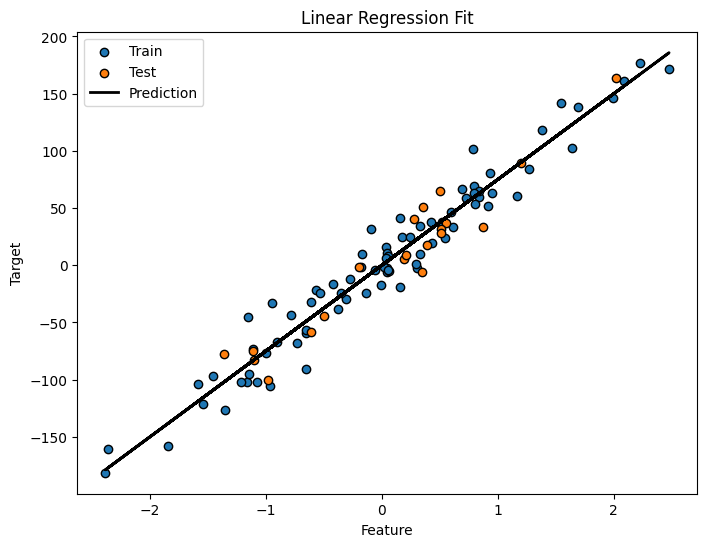

In [7]:
import matplotlib.pyplot as plt

y_pred_line = reg.predict(X)          # full grid for smooth line
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color="tab:blue", edgecolors="k", label="Train")
plt.scatter(X_test, y_test, color="tab:orange", edgecolors="k", label="Test")
plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
plt.title("Linear Regression Fit")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

## ✅ Summary
- Implemented closed-form **MSE** and **$R^2$** metrics.  
- Built a tiny **gradient-descent optimiser** in <40 lines.  
- Achieved high $R^2$ on a synthetic 1-D problem.  
- Try experimenting: normalise features, decrease noise, or switch to the **normal equation** for an analytic solution!